In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
RANDOM_SEED=42

In [2]:
# Load dataset
data = pd.read_csv('/content/heart.csv')  # Update with your dataset path
df = pd.DataFrame(data)
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
           'thal', 'num']

print("Dataset preview:")
print(df.head())

Dataset preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
!pip install iterative-stratification

In [5]:

from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

def split_data(indexes, stratified_features, test_size=0.5, k_folds=1, random_state=0):
    """ split the data into two parts
    """
    mskf = MultilabelStratifiedShuffleSplit(n_splits=k_folds,
                                            test_size=test_size,
                                            random_state=random_state)
    # the split return k-fold based on n_splits value
    set1_indexes = [0]*k_folds
    set2_indexes = [0]*k_folds
    fold_idx = 0
    # split the data and generate k-folds
    for set1_fold_index, set2_fold_index in mskf.split(indexes, stratified_features):
        set1_indexes[fold_idx], set2_indexes[fold_idx] = \
            indexes[set1_fold_index], indexes[set2_fold_index]
        fold_idx += 1
    return set1_indexes, set2_indexes

In [6]:
indexes = np.array(df.index)
features = df.to_numpy()
# split data to train and test
train_indexes, test0_indexes =  split_data(indexes, features, test_size=0.3, k_folds=1, random_state=RANDOM_SEED)
# split test to validation and test
test0_df = df.loc[test0_indexes[0]]
valid_indexes, test_indexes =  split_data(np.array(test0_df.index), test0_df.to_numpy(), test_size=0.5, k_folds=1, random_state=RANDOM_SEED)


print('train \n', train_indexes[0])
print('valid \n', valid_indexes[0])
print('test \n', test_indexes[0])

train 
 [  3   4   5   6   7   8   9  10  11  15  17  18  19  21  22  24  25  26
  29  30  31  32  33  37  38  39  42  44  45  46  47  48  49  51  52  53
  54  59  60  62  63  66  67  68  69  70  72  73  75  76  77  78  79  80
  81  82  84  85  88  89  90  91  92  93  96  99 101 102 103 104 108 109
 111 112 113 114 115 116 117 118 119 123 124 125 126 127 128 129 131 132
 133 137 138 139 140 143 144 145 146 147 151 152 155 156 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 174 175 176 177 178 179 181
 182 183 184 185 186 187 190 192 193 194 195 196 197 198 200 202 203 204
 205 207 208 209 210 213 214 216 217 219 221 222 223 226 227 228 229 230
 231 232 234 236 241 242 244 246 247 249 250 251 253 254 255 257 258 260
 261 262 263 265 267 268 269 270 272 273 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 291 292 294 295 296 300 302]
valid 
 [  1  13  14  23  28  34  43  50  57  61  64  65  71  74  83  86  95  98
 105 106 107 121 130 141 149 153 157 188 189 191 2

In [7]:
train_df = df.loc[train_indexes[0]]
valid_df = df.loc[valid_indexes[0]]
test_df = df.loc[test_indexes[0]]

print(len(train_df))
print(len(valid_df))
print(len(test_df))

212
43
48


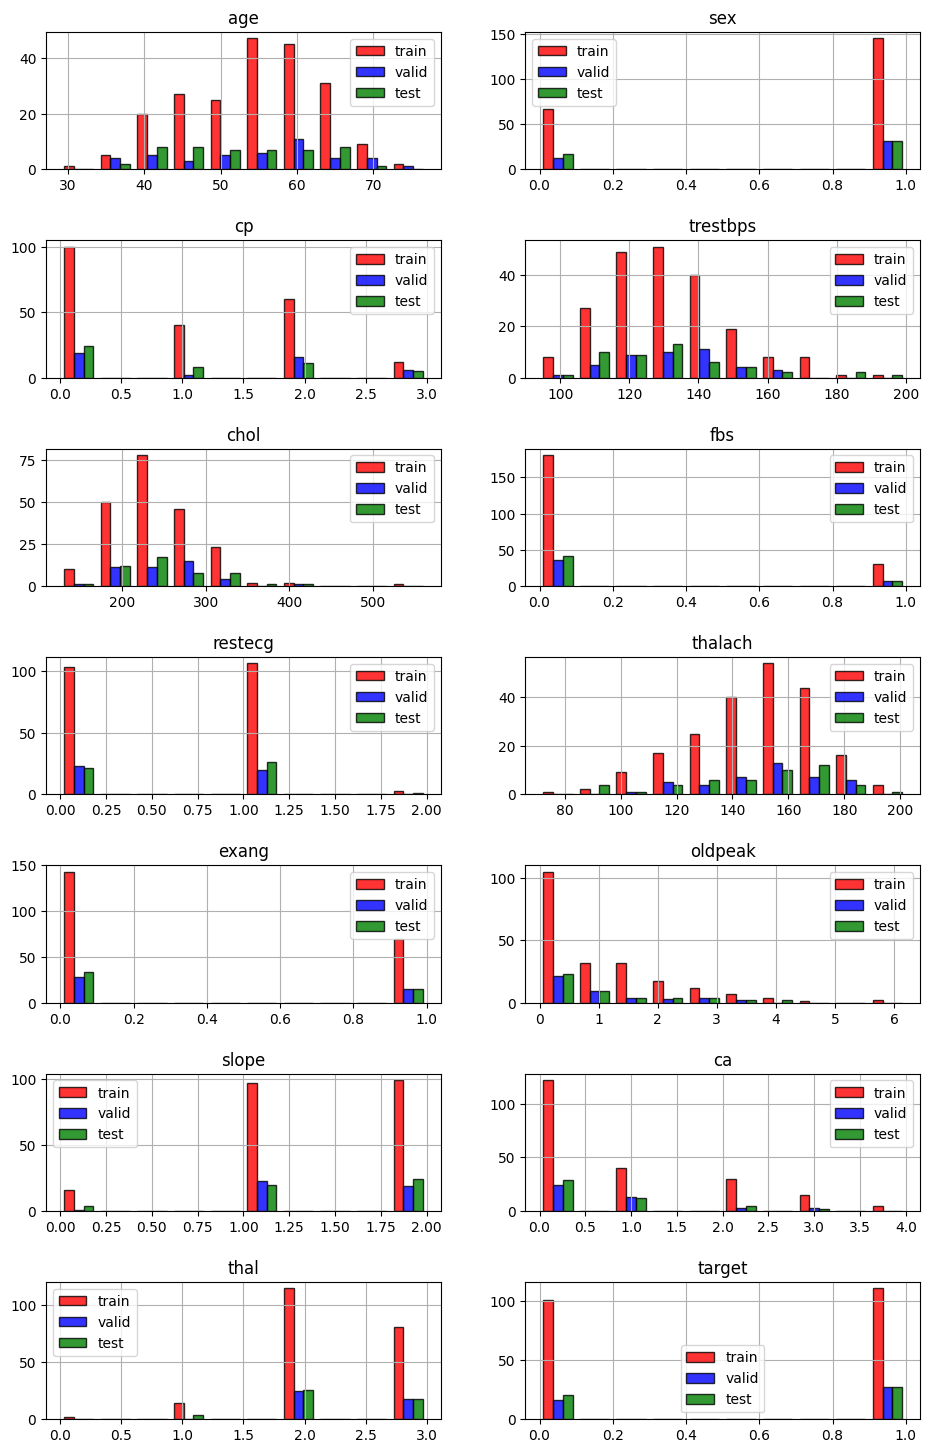

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(7, 2, figsize=(10, 15))
fig.tight_layout(pad=3.0)

axes = ax.flatten()
for feature_i, subplot_i in zip(range(14), axes):
    counts, bins = np.histogram(df.iloc[:, feature_i])
    subplot_i.hist([train_df.iloc[:, feature_i], valid_df.iloc[:, feature_i], test_df.iloc[:, feature_i]], bins= bins,
                   color=colors, alpha=0.8, edgecolor='black')
    subplot_i.grid()
    subplot_i.legend(['train', 'valid', 'test'])
    subplot_i.set_title(train_df.columns[feature_i])

# train_df.hist(grid=True, figsize=(10,20), layout=(7,2), edgecolor='black');
# valid_df.hist(grid=True, figsize=(10,20), layout=(7,2), edgecolor='black');
# test_df.hist(grid=True, figsize=(10,20), layout=(7,2), edgecolor='black');

In [9]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

train_normalised_df = train_df.copy()
valid_normalised_df = valid_df.copy()
test_normalised_df = test_df.copy()

# Select from StandardScaler or MinMaxScaler
scaler = StandardScaler()   # MinMaxScaler((-1,1))
train_normalised_df[col_names[:13]] = scaler.fit_transform(train_df.iloc[:, :13].to_numpy())
valid_normalised_df[col_names[:13]] = scaler.transform(valid_df.iloc[:, :13].to_numpy())
test_normalised_df[col_names[:13]] = scaler.transform(test_df.iloc[:, :13].to_numpy())

print(train_normalised_df.head())
print(valid_normalised_df.head())
print(test_normalised_df.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
3  0.134111  0.679757  0.076416 -0.662049 -0.177706 -0.413849  0.895431   
4  0.248294 -1.471115 -0.936097 -0.662049  2.098537 -0.413849  0.895431   
5  0.248294  0.679757 -0.936097  0.482300 -1.026475 -0.413849  0.895431   
6  0.134111 -1.471115  0.076416  0.482300  0.941125 -0.413849 -1.002882   
7 -1.236082  0.679757  0.076416 -0.662049  0.343129 -0.413849  0.895431   

    thalach     exang   oldpeak     slope        ca      thal  target  
3  1.265102 -0.694635 -0.201843  0.975399 -0.721667 -0.471319       1  
4  0.593142  1.439605 -0.371985  0.975399 -0.721667 -0.471319       1  
5 -0.078818 -0.694635 -0.542127 -0.627582 -0.721667 -2.057344       1  
6  0.145169 -0.694635  0.223512 -0.627582 -0.721667 -0.471319       1  
7  1.041116 -0.694635 -0.882412  0.975399 -0.721667  1.114706       1  
         age       sex        cp  trestbps      chol       fbs   restecg  \
1  -2.035361  0.679757  1.088929 -0.08987

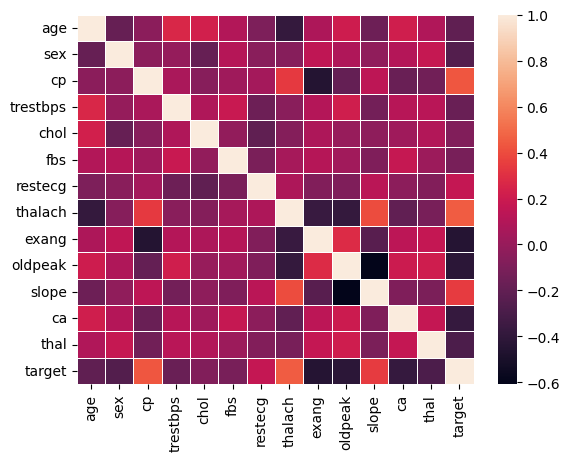

In [10]:
import seaborn as sns

corr = train_normalised_df.corr()
# print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.5);

In [11]:
# save files
train_normalised_df.to_csv('/content/train.csv')
valid_normalised_df.to_csv('/content/valid.csv')
test_normalised_df.to_csv('/content/test.csv')

In [12]:
print(train_normalised_df.iloc[:, :13].values[1])

[ 0.24829357 -1.47111492 -0.93609688 -0.66204852  2.09853677 -0.41384867
  0.89543064  0.59314214  1.43960542 -0.37198525  0.97539919 -0.72166713
 -0.47131876]
